# CS 440 Final Project: Connect 4 AI - Heuristic Tournament

### **Author**: Zach Goodenow
<br>
> **Date**: 12/12/17
<br>
> **School**: Colorado State University
<br>
> **Course**: Introduction to Artificial Intelligence
<br>
> **Professor**: Chuck Anderson
<br>
> **CSU Email**: zachgood@rams.colostate.edu
<br>
> **Personal Email**: zachgoodenow@icloud.com

# Table Of Contents

* [1. Introduction](#Intro)
    * [1.1 Tic-Tac-Toe](#TicTacToe)
    * [1.2 Connect 4](#Connect4)
* [2. Backgroud](#Background)
    * [2.1 Definitions & Algorithms](#DandA)
* [3. Methods](#Methods)
    * [3.1 Increase game efficiency & speed](#EffSpeed)
        * [3.1.1 Using numpy board](#UsingNumpy)
        * [3.1.2 Without numpy board](#WONumpy)
    * [3.2 Utility Functions Using Heuristics](#UtFun)
        * [3.2.1 Development](#Dev)
            * [3.2.1.1 Original Heuristic](#O)
            * [3.2.1.2 Count 2 Win Heuristic](#C2W)
            * [3.2.1.3 Simple Heuristic](#S)
            * [3.2.1.4 Next Move Win Count Heuristic](#NMWC)
        * [3.2.2 Examples](#Examples)
        * [3.2.3 Performance Evaluation](#Eval)
            * [3.2.3.1 Speed](#Speed)
            * [3.2.3.2 Effective Branching Factor](#EBF)
* [4. Results](#Results)
    * [4.1 Utility vs Random](#UvR)
    * [4.2 Tournament](#Tournament)
        * [4.2.1 Utility Tournament](#UtilityTournament)
        * [4.2.2 Depth Tournament](#DepthTournament)
    * [4.3 A Tie Game?](#Tie)
* [5. Conclusion](#Conclusion)
    * [5.1 Best Player](#BestPlayer)
    * [5.2 Do You Think You Can Win?](#YouPlay)
    * [5.3 Word Count](#WordCount)
* [6. References](#References) 

<a id='Intro'></a>
## Introduction

Connect 4 is a two-player game played on a board with 6 rows and 7 columns.  Each turn, a player selects a column to insert their piece, which falls straight down, occupying the next available space.   The objective of the game is to arrange your pieces to form a horizontal, vertical, or diagonal connection of 4 or more before the other player.  **Connect Four is a solved game**, meaning that the first player can always win by playing the right moves. Hence, a proper implementation will result in an artificial intelligence that will always win.  More information about the game can be found on the [Wikipedia about Connect 4](https://en.wikipedia.org/wiki/Connect_Four)

In [9]:
from IPython.display import HTML, display, IFrame
display(HTML("<table><tr><td><img src='https://upload.wikimedia.org/wikipedia/en/7/79/Connect_4_Board_and_Box.jpg'></td><td><img src='https://upload.wikimedia.org/wikipedia/commons/a/ad/Connect_Four.gif'></td></tr></table>"))

,


<a id='TicTacToe'></a>
### Tic-Tac-Toe

In *Assignment 4: Negamax with Alpha-Beta Pruning and Iterative Deepening*, we were tasked with applying negamax and alpha-beta pruning to a game of tic-tac-toe.  I found [this website](https://www.jesperjuul.net/ludologist/2003/12/28/255168-ways-of-playing-tic-tac-toe/) which documents every single game of Tic Tac Toe. It gives the following numbers: 

<div class="alert alert-block alert-warning">

 - 255,168 unique games of Tic Tac Toe to be played. 
 - Of these, 131,184 are won by the first player, 77,904 are won by the second player, and 46,080 are drawn.
 
 

I successfully applied negamax, negamax iterative deepening search, negamax alpha-beta pruned, and negamax alpha-beta pruned iterative deepening search.  All 4 algorithms will never lose at a search depth of 9 because they search every possible game that can result after each turn. The code for Tic-Tac-Toe was given in assignment 4. I also implemented a feature to let user input play against these algorithms 
<br><br>
For simplicity, I will only include an example of UI vs NegamaxIDSab at a depth of 10, but any combination of algorithms, depths, and opponents can be played.

In [2]:
%%capture
from importlib import reload
import Negamax
import NegamaxAB
from TicTacToe import *
from PlayTTT import *

In [3]:
# RUN THIS CELL TO PLAY TIC-TAC-TOE
playTTT_1vComp(game = TTT(), depthLimit = 10, opponent = TTT_UI, algorithm = NegamaxAB.negamaxIDSab)

Move positions:
0|1|2
-----
3|4|5
-----
6|7|8
Would you like to go first? (Y(es) or N(o))
y
 | | 
-----
 | | 
-----
 | | 
COMPUTER IS X
Your Move...(or exit with (q)uit)
1
Player O to 1
 |O| 
-----
 | | 
-----
 | | 
Player X to 4 for score 1
 |O| 
-----
 |X| 
-----
 | | 
Your Move...(or exit with (q)uit)
3
Player O to 3
 |O| 
-----
O|X| 
-----
 | | 
Player X to 0 for score 1
X|O| 
-----
O|X| 
-----
 | | 
Your Move...(or exit with (q)uit)
4

NOT A VALID MOVE!

Pick from one of the following --->  [2, 5, 6, 7, 8]
Your Move...(or exit with (q)uit)
2
Player O to 2
X|O|O
-----
O|X| 
-----
 | | 
Player X to 8 for score 1
X|O|O
-----
O|X| 
-----
 | |X
Computer won!
Nodes explored during this game:  2134


<a id='Connect4'></a>
### Connect 4

After I learned these algorithms and applied them to tic-tac-toe, I knew I could apply them to connect 4.  Ever since I was a kid, I loved to play connect 4.  I would always beg my mom to play with me because it was a game that I was very good at.  My experience playing connect 4 as a kid helped me develop the game and heuristics. I also found a website about [Basic Connect 4 AI](https://roadtolarissa.com/connect-4-ai-how-it-works/) which was helpful to understand sombe basic steps that can be taken to understanding the logic behind Connect 4

<div class="alert alert-block alert-warning">
**What makes Connect 4 harder than Tic-Tac-Toe**
* 4,531,985,219,092 unique states for all game boards populated with 0 to 42 pieces
* 42 moves in full game board = max search depth of 42.  
* If most states have 7 valid moves, the search tree grows far to large to be fully searched, even with alpha-beta pruning.  
* After 1 move there are 7 possible game states, after 2 there are 49, after 3 there are 343, after 4 there are 2401...

<a id='Background'></a>
## Background

<a id='DandA'></a>
A **Heuristic** is a search function that estimates the number of steps it would take to achieve a the goal state from a start state.  If a heuristic is **admissible** it never overestimates the cost of the minimum cost path from a node to the goal node (lecture notes 9 from [Chuck Anderson CS440](http://www.cs.colostate.edu/~anderson/cs440/doku.php)).

**Adversarial search** was introduced in lecture notes 11 from [Chuck Anderson CS440](http://www.cs.colostate.edu/~anderson/cs440/doku.php).  The notes focused on games that are deterministic and completely observable. In these games, we also assumed that the payoff to each player at the end of a game is equal and opposite, called **zero-sum**.  In a some games, it is required to subtract the outcome of player 1 from the outcome of player 2.  A game is defined as follows: 

Definition of a game:
  * initial state $s_0$
  * $player(s)$: which player is to move in state $s$,
  * $actions(s)$: legal actions from state $s$,
  * $result(s,a)$: state that results, like our `takeActionF`
  * $terminalTest(s)$: true when game is over
  * $utility(s,p)$: payoff for player $p$ upon reaching state $s$.

The notes also described **minimax**, a search algorithm in which the two players in a two person game will be called `Max` and `Min`. These names reflect the meaning of the $utility(s,p)$ function, which is to be maximized by Player `Max` and minimized by Player `Min`. 

The next note set (lecture notes 12 by Chuck Anderson) introduced the **negamax** algorithm compared to minimax.  Simply put, negamax search behaves identical to minimax, but rather than alternating between maximizing and minimizing steps, every step aims to maximize.  This can be achieved if the values from each node are negated every time and the utility in terminal states for one player is always the negative of the utility for the other player.

However, these search algorithms can be inefficient in games with large sets of possible terminal states.  To increase efficiency, **Alpha-Beta Pruning** can be applied to decrease the number of nodes that are evaluated.  

For each node, keep track of 

$alpha$ is best value by any means
  * Any value less than this is no use because we already now how to achieve at least a value of $alpha$
  * Minimum value Max can get
  * Initially, negative infinity

*beta* is worst value for the opponent
  * Anything higher than this won't be useful to opponent
  * Maximum score Min can get
  * Initially, infinity

The span between *alpha* and *beta* progressively gets smaller.

Any position for which *beta* < *alpha* can be pruned.

<a id='Methods'></a>
## Methods

My overall goal was to make an AI opponent that was good enough to beat me every time and made moves in a reasonable time.  I also wanted to test some heuristics against each other to determine which one gave the "best" game utility.  

After I finished assignment 4, I was able to make a connect 4 game class.  But when I applied the negamax algorithms to the game, it was unable to search deep enough to make valuable move decisions. For this reason, I developed a heuristic function to estimate the value that a state had.  This heuristic is calculated when the game utility is requested on a game that is not over.  I used the zero-sum property to subtract Os utility from Xs, so the utility will be negated if the next player to move is O.  This code was functional and for a negamaxAB at depth 6, the program would usually beat me.  However, I was able to get a few wins and the program needed to be sped up.

<a id='EffSpeed'></a>
### Increase game efficiency & speed
<a id='UsingNumpy'></a>
#### Using numpy board

For my first attempt, I tried to make connect 4 by using a numpy 2d array for the board and functions.  Using numpy improved the simplicity of the connect 4 class because **it cut the lines of code from about 450 to about 200**. However, numpy actually slowed the program down overall.  I analyzed the speed of each below.  I looked at the speed of row, column, and diagonal access as they are the most used functions.  I also looked at the speed of making moves, unmaking moves, and checking win considering those functions will be repeated hundreds of thousands of times, if not millions for every game played. 

<a id='WONumpy'></a>
#### Without numpy board

The speed results showed that using numpy arrays for the board was not what I wanted.  While it improved the readability of the code, it slowed down the most used functions.  For this reason I decided to not use a numpy 2d array for the game board.  I then set out to speed up the program in other ways.  After many attempts, these changes had the most influence on speeding up the program:
* 1.) Direct access of element in board for diagonals with hard coded spots
* 2.) Simplified getMoves() - columns that have empty spots in top row
* 3.) Check win by collapsing board down to string of rows, colums, and diagonals, then check for '*XXXX*' or '*OOOO*'

I put these changes into a new class called *C4Fast.py*.  Speed is analyzed below for the functions *getDiagDown()*, *getDiagUp()*, *getMoves()*, *makeMove()*, *unmakeMove()*, and *isWon()*:

In [4]:
import time
import ConnectFour
import NewC4
import C4Fast

In [322]:
%%capture
reload(ConnectFour)
reload(NewC4)
reload(C4Fast)

In [199]:
c4_old = ConnectFour.C4(load=True) # Old c4 game with example state to test
print('Old version of connect 4\n', c4_old)
c4_np = NewC4.NC4(load=True) # Numpy c4 game
print('\nNumpy board version of connect 4\n', c4_np)
c4_fast = C4Fast.C4(load=True) # Fastest c4 game
print('\nFastest version of connect 4\n', c4_fast)

# Compare diagonal access
print('\nCompare getDiagDown() and getDiagUp()')
startTime = time.time()
for i in range(100000):
    ddown = c4_old.getDiagDown()
    dup = c4_old.getDiagUp()
print('\tOld C4 took {0:.5f} seconds'.format(time.time() - startTime))
startTime = time.time()
for i in range(100000):
    ddown = c4_np.getDiagDown()
    dup = c4_np.getDiagUp()
print('\tNumpy C4 took {0:.5f} seconds'.format(time.time() - startTime))
startTime = time.time()
for i in range(100000):
    ddown = c4_fast.getDiagDown()
    dup = c4_fast.getDiagUp()
print('\tFast C4 took {0:.5f} seconds'.format(time.time() - startTime))

# Compare get move, make move, and unmake move
print('\nCompare getMoves(), makeMove(), unmakeMove()')
startTime = time.time()
for i in range(100000):
    move = c4_old.getMoves()[i%6]
    c4_old.makeMove(move)
    c4_old.unmakeMove(move)
print('\tOld C4 took {0:.5f} seconds'.format(time.time() - startTime))
startTime = time.time()
for i in range(100000):
    move = c4_np.getMoves()[i%6]
    c4_np.makeMove(move)
    c4_np.unmakeMove(move)
print('\tNumpy C4 took {0:.5f} seconds'.format(time.time() - startTime))
startTime = time.time()
for i in range(100000):
    move = c4_fast.getMoves()[i%6]
    c4_fast.makeMove(move)
    c4_fast.unmakeMove(move)
print('\tFast C4 took {0:.5f} seconds'.format(time.time() - startTime))

# Compare win checking
print('\nCompare isWon()')
startTime = time.time()
for i in range(100000): c4_old.isWon()
print('\tOld C4 took {0:.5f} seconds'.format(time.time() - startTime))
startTime = time.time()
for i in range(100000): c4_np.isWon()
print('\tNumpy C4 took {0:.5f} seconds'.format(time.time() - startTime))
startTime = time.time()
for i in range(100000): c4_fast.isWon()
print('\tFast C4 took {0:.5f} seconds'.format(time.time() - startTime))

Old version of connect 4
 _ 0 _ 1 _ 2 _ 3 _ 4 _ 5 _ 6 _
0   |   | O |   |   |   |   |
|---+---+---+---+---+---+---|
1   |   | X |   |   |   |   |
|---+---+---+---+---+---+---|
2   |   | O | O |   |   |   |
|---+---+---+---+---+---+---|
3   |   | O | X |   |   |   |
|---+---+---+---+---+---+---|
4   | X | X | O |   |   |   |
|---+---+---+---+---+---+---|
5 O | X | X | X | O |   |   |
-----------------------------

Numpy board version of connect 4
 _ 0 _ 1 _ 2 _ 3 _ 4 _ 5 _ 6 _
0   |   | O |   |   |   |   |
|---+---+---+---+---+---+---|
1   |   | X |   |   |   |   |
|---+---+---+---+---+---+---|
2   |   | O | O |   |   |   |
|---+---+---+---+---+---+---|
3   |   | O | X |   |   |   |
|---+---+---+---+---+---+---|
4   | X | X | O |   |   |   |
|---+---+---+---+---+---+---|
5 O | X | X | X | O |   |   |
-----------------------------

Fastest version of connect 4
 _ 0 _ 1 _ 2 _ 3 _ 4 _ 5 _ 6 _
0   |   | O |   |   |   |   |
|---+---+---+---+---+---+---|
1   |   | X |   |   |   |   |
|---+---

<a id='UtFun'></a>
### Utility Functions Using Heuristics
<a id='Dev'></a>
#### Development

<div class="alert alert-block alert-info">
At this point, I decided to go without numpy 2d array for the board.  But I still needed to speed up the heuristic used in *getUtility()*.  To do this, **I added an argument in *getUtility()* for a heuristic-based function** that will estimate the value of a state that is not over.  If *None* is passed for this argument, the function simply returns 0.  This also would be helpful for me to create different functions and test them against each other.  The *getUtility()* function now looks like this
```python
def getUtility(self, utilityFunction = nextMoveWinCount): 
    won, winner = self.isWon()
    if winner is 'X': return 1000 if self.nextPiece is 'X' else -1000
    elif winner is 'O': return 1000 if self.nextPiece is 'O' else -1000
    elif self.isFull(): return 0
    else:
        utilityValue = utilityFunction(self) if utilityFunction is not None else 0
        return utilityValue if self.nextPiece is 'X' else (utilityValue * -1)
```

<div class="alert alert-block alert-info">
After I made this change, I had to change how *negamax* and *negamaxab* used *getUtility()*.  The reason why I did this is because I planned on eventually making different "players" that would use different heuistic-based functions.
```python
        def negamax(game, depthLeft, utilityFunction = None):
        def negamaxab(game, depthLeft, utilityFunction = None, alpha = -float('Inf'), beta = float('Inf')):
```
And they would call *getUtility()* as
```python
        return game.getUtility(utilityFunction), None
```

<a id='O'></a>
##### Original Heuristic

The **original heuristic** I developed started simple but got messy quickly. Looking back at the code now, it is hard for me to remember what I was doing with every step.  But this function works as follows

        For each row, column, and diagonal:
            Get chunks of potential win spots for 'piece'
        For these counts: 
            Take the largest count in all rows, columns, and diagonals
        Square this number (because 3 in a row is much more valuable than 2, or 1)
        Add them all together
        Add 10 to this number for every move that would win the game right away
        If one of the moves from getMoves() can win the game, return 500
        Return this number for 'piece'

This number is applied for *X* and for *O*.  Using zero-sum, subtract the counts of *O* from the counts of *X*.

<a id='C2W'></a>
##### Count 2 Win Heuristic

The next heuristic I developed was intended to be more straight forward.  I call this heuristic **Count2WinHeuristic** and it simply counts the open spots that would result in a win if a piece were to be placed there.  Here is how I do it for one piece type:

        For every spot that is empty:
            Put 'piece' there
            If game is won, add 1 to singleCount, remove 'piece', and continue to next open spot
            For every additional spot that is empty:
                Put 'piece' there
                If game is won, add 1 to doubleCount, remove 'piece', and continue to next open spot
                For every additional spot that is empty:
                    Put 'piece' there
                    If game is won, add 1 to tripleCount, remove 'piece', and continue to next open spot
                    Make third spot empty again
                Make second spot empty again
            Make first spot empty again
        Return singleCount, doubleCount, tripleCount
        
These counts are made for *X* and for *O*.  Using zero-sum, subtract the counts of *O* from the counts of *X*, resulting in 3 values; *singleCountZeroSum*, *doubleCountZeroSum*, and *tripleCountZeroSum*.  At this point, I make 3 different utility values by combining the 3 zero-sum counts in different ways
* **Utility1**: return $singleCountZeroSum + doubleCountZeroSum + tripleCountZeroSum$
* **Utility2**: return $singleCountZeroSum * 3 + doubleCountZeroSum * 2 + tripleCountZeroSum$
* **Utility3**: return $singleCountZeroSum^3 + doubleCountZeroSum^2 + tripleCountZeroSum$ making sure to restore negative to *doubleCountZeroSum* if it was negative before being squared 

The reason why I made these 3 utilities was because the counts for each move have different values.  Obviously, a win with 1 empty spot filled is more valuable than a win with 2 or 3 empty spots filled.  But what if there were many ways to win with 2 empty spots filled?  Each utility here puts weights to each of these counts.  If the weight is too high for *singleCountZeroSum*, the heuristic would be narrow-minded, but if the weight is too low, the heuristic would be more focused on getting 2 in a row.

<a id='S'></a>
##### Simple Heuristic

The simple heuristic does what *Count2WinHeuristic* does but only for one empty spot.  I developed this heuristic in hopes of making a control player to test heuristics - a player that is good enough to defend but can still be beat.  

<a id='NMWC'></a>
##### Next Move Win Count Heuristic 

Even more basic than *SimpleHeuristic*, *NextMoveWinCount* simply returns the number of moves from *getMoves()* that will win a game for the next piece.  It negates this number if the next piece is O to comply with the zero-sum property. This is the default heuristic used in *getUtility()*.  It is basically a search algorithm that only searches a depth of 1.

<a id='Examples'></a>
#### Examples

In [4]:
import OriginalHeuristic # OrigonalHeuristic
import Count2WinHeuristic # Count2WinHeuristic 1, 2, & 3
import SimpleHeuristic # SimpleHeuristic
from C4Helpers import * # NextMoveWinCount
from ListTable import * # For the tables I use

In [192]:
%%capture
reload(OriginalHeuristic)
reload(Count2WinHeuristic)
reload(SimpleHeuristic)

<a id='E1'></a>
##### Example 1

<div class="alert alert-block alert-success">
What would one value the following state if they were player *X*? Is this board more favorable for player *X* or for player *O*? I will answer this question using *getUtility()* and each heuristic.  A higher value indicates a more favorable state for *X*, while a negative number means the state is more favorable for *O*. 

In [125]:
TestC4 = C4Fast.C4(load=True)
print(TestC4, 'Next piece is', TestC4.nextPiece)

_ 0 _ 1 _ 2 _ 3 _ 4 _ 5 _ 6 _
0   |   | O |   |   |   |   |
|---+---+---+---+---+---+---|
1   |   | X |   |   |   |   |
|---+---+---+---+---+---+---|
2   |   | O | O |   |   |   |
|---+---+---+---+---+---+---|
3   |   | O | X |   |   |   |
|---+---+---+---+---+---+---|
4   | X | X | O |   |   |   |
|---+---+---+---+---+---+---|
5 O | X | X | X | O |   |   |
----------------------------- Next piece is X


In [126]:
print('Original:', TestC4.getUtility(OriginalHeuristic.utility))
print('Count2Win 1:', TestC4.getUtility(Count2WinHeuristic.utility1))
print('Count2Win 2:', TestC4.getUtility(Count2WinHeuristic.utility2))
print('Count2Win 3:', TestC4.getUtility(Count2WinHeuristic.utility3))
print('Simple:', TestC4.getUtility(SimpleHeuristic.utility))
print('NextMoveWinCount:', TestC4.getUtility())
print('No Heuristic:', TestC4.getUtility(None))

Original: 0
Count2Win 1: -7
Count2Win 2: -10
Count2Win 3: -13
Simple: 0
NextMoveWinCount: 0
No Heuristic: 0


But which move should be made based off each heuristic? We can determine this by making a move and evaluate the resulting utility.  But the utility will come back from the perspective of *O*, so we need to negate it. 

In [196]:
table = ListTable()
table.append(['Move Made By X', 'Original', 'Count2Win 1', 'Count2Win 2', 'Count2Win 3', 
              'Simple', 'NextMoveWinCount', 'None'])
for move in TestC4.getMoves(): # Loop through all moves that X can make
    TestC4.makeMove(move)
    table.append([move, -TestC4.getUtility(OriginalHeuristic.utility), 
                  -TestC4.getUtility(Count2WinHeuristic.utility1),
                  -TestC4.getUtility(Count2WinHeuristic.utility2),
                  -TestC4.getUtility(Count2WinHeuristic.utility3),
                  -TestC4.getUtility(SimpleHeuristic.utility),
                  -TestC4.getUtility(),
                  -TestC4.getUtility(None)])
    TestC4.unmakeMove(move)
table

Move Made By X,Original,Count2Win 1,Count2Win 2,Count2Win 3,Simple,NextMoveWinCount,None
0,-7,6,6,12,-2,-1,0
1,1000,1000,1000,1000,1000,1000,1000
3,-10,8,8,14,-2,-1,0
4,-7,8,9,22,-2,-1,0
5,-10,5,4,5,-2,-1,0
6,-10,6,6,12,-2,-1,0


The largest number in each column corresponds with the row for move that the utility function would suggest.  *OriginalHeuristic* and *SimpleHeuristic* would make move 1, which would allow player *O* to make move 1 and win the game.  *OriginalHeuristic* and *SimpleHeuristic* choose this move because it would create two 'three in a row' runs for *X*.  In fact, move 1 would be the WORST move to make at this state.  

This is basically the process that *negamax* would take if it were to search max depth 1.  In fact, if you call *negamax* with this data, it will return matching information (*bestValue*, *bestMove*) from the table above.   

<a id='E2'></a>
##### Example 2

<div class="alert alert-block alert-success">
Repeat the process above if *X* made move 1.  This time, don't negate the value because it will come back from the perspective of *X*.  

In [190]:
TestC4.makeMove(1)
print(TestC4)

_ 0 _ 1 _ 2 _ 3 _ 4 _ 5 _ 6 _
0   |   | O |   |   |   |   |
|---+---+---+---+---+---+---|
1   |   | X |   |   |   |   |
|---+---+---+---+---+---+---|
2   |   | O | O |   |   |   |
|---+---+---+---+---+---+---|
3   | X | O | X |   |   |   |
|---+---+---+---+---+---+---|
4   | X | X | O |   |   |   |
|---+---+---+---+---+---+---|
5 O | X | X | X | O |   |   |
-----------------------------


In [197]:
table = ListTable()
table.append(['Move Made By O', 'Original', 'Count2Win 1', 'Count2Win 2', 'Count2Win 3', 
              'Simple', 'NextMoveWinCount', 'None'])
for move in TestC4.getMoves(): # Loop through all moves that O can make
    TestC4.makeMove(move)
    table.append([move, TestC4.getUtility(OriginalHeuristic.utility), 
                  TestC4.getUtility(Count2WinHeuristic.utility1),
                  TestC4.getUtility(Count2WinHeuristic.utility2),
                  TestC4.getUtility(Count2WinHeuristic.utility3),
                  TestC4.getUtility(SimpleHeuristic.utility),
                  TestC4.getUtility(),
                  TestC4.getUtility(None)])
    TestC4.unmakeMove(move)
table

Move Made By O,Original,Count2Win 1,Count2Win 2,Count2Win 3,Simple,NextMoveWinCount,None
0,7,-6,-6,-12,2,1,0
1,-1000,-1000,-1000,-1000,-1000,-1000,-1000
3,10,-8,-8,-14,2,1,0
4,7,-8,-9,-22,2,1,0
5,10,-5,-4,-5,2,1,0
6,10,-6,-6,-12,2,1,0


The interpretation of this table is different than *Example 1* because they represent moves that *O* can make.  The Presence of $-1000$ indicates that the game can be won by O with that move.  If this example was being used by *NegamaxAB* it would indicate an opportunity to prune move from *Example 1*.

<a id='Eval'></a>
#### Performance evaluation

In [8]:
import math
import random
import matplotlib.pyplot as plt

In [11]:
TestC4 = C4Fast.C4()
utilityList = [None, nextMoveWinCount, SimpleHeuristic.utility, OriginalHeuristic.utility,
               Count2WinHeuristic.utility1, Count2WinHeuristic.utility2, Count2WinHeuristic.utility3]
utilityNames = ['None', 'Next Move Win Count', 'Simple', 'Original', 'C2W 1', 'C2W 2', 'C2W 3']

<a id='Speed'></a>
##### Speed

The following plot shows the speed of each utility function.  We can see that the quickest result comes from not using a utility function and the slowest result comes from *SimpleHeuristic*.  This is very helpful because I was planning on testing heuristics with *SimpleHeuristic* which I will not do now because it will take much longer.  I am happy to see that the 3 utilities from *Count2Win* are almost the exact same speed and much faster than the original heuristic I developed. 

The table shows the values returned by *Negamax* at each depth for each utility function.  This table indicates that *None*, *NextMoveWinCount*, and *Simple* heuristics aren't very helpful to *Negamax* during early states of connect 4.  This makes sense because they all depend on finding a winning game which cannot happen after 6 moves.  The table also indicates that making the first move in column 3 is favored the most. 

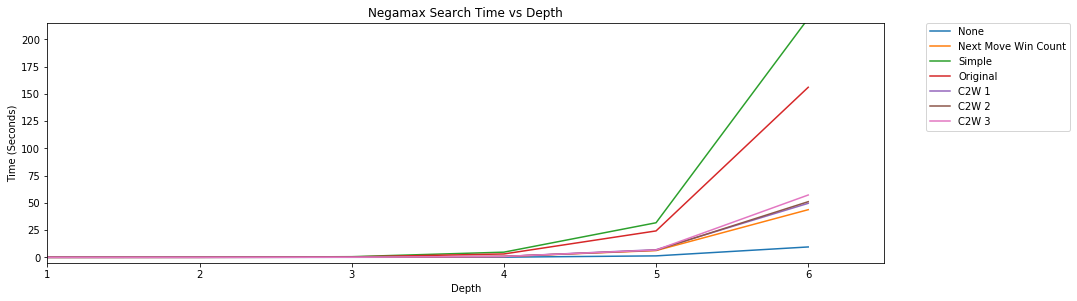

,Depth 1,Depth 2,Depth 3,Depth 4,Depth 5,Depth 6
None,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)"
Next Move Win Count,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)"
Simple,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)"
Original,"(4, 3)","(-1, 3)","(3, 2)","(-2, 0)","(8, 3)","(-1, 3)"
C2W 1,"(7, 3)","(-3, 1)","(9, 3)","(-2, 3)","(6, 3)","(0, 3)"
C2W 2,"(7, 3)","(-3, 1)","(9, 3)","(-2, 3)","(8, 4)","(-1, 3)"
C2W 3,"(7, 3)","(-3, 1)","(9, 3)","(-2, 3)","(9, 3)","(-1, 3)"


In [13]:
table = ListTable()
table.append(['    ', 'Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5', 'Depth 6'])
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)

for i in range(len(utilityList)):
    row = [utilityNames[i]]
    trackTime = [0]
    trackValMove = []
    for depth in range(1,7):
        startTime = time.time()
        bestValue, bestMove = Negamax.negamax(TestC4, depth, utilityList[i])
        searchTime = time.time()-startTime
        trackTime.append(searchTime)
        trackValMove.append((bestValue, bestMove))
    plt.plot(trackTime, label = utilityNames[i])
    row.extend(trackValMove)
    table.append(row)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Negamax Search Time vs Depth')
plt.xlabel('Depth')
plt.ylabel('Time (Seconds)')
plt.axis([1, 6.5, -5, 215])
plt.show()
table

<a id='EBF'></a>
##### Effective Branching Factor

The following plot shows the effective branching factor for each heuristic as depth increases using *NegamaxAB* because it allows the heuristic utilities to prune moves.  You can see that *OriginalHeuristic* had the worst effective branching factor, meaning it was the least efficient.  *Count2Win.Utility1*, *Count2Win.Utility2*, and *Count2Win.Utility3* are among the most efficient heuristics to apply to *NegamaxAB* which indicates that they might be good utilities to use for game play.

The table shows the (*score*, *move*) that each heuristic gets at each depth.  They are actually exactly the same when using *negamax* but this is expected because *negamax* searched all the nodes that *NegamaxAB* searched.

In [9]:
from ebf import *

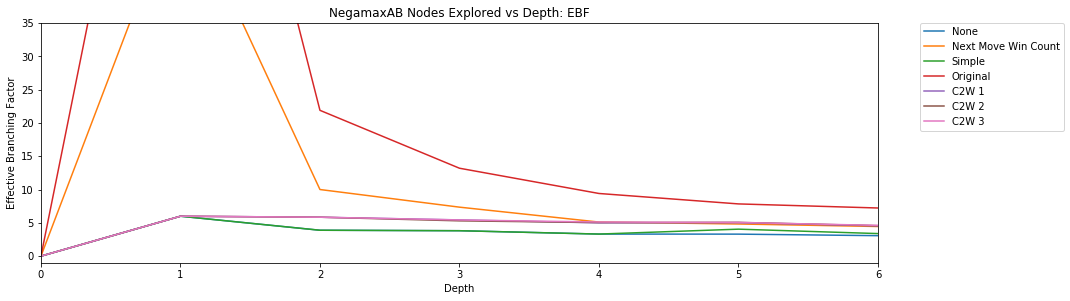

,Depth 1,Depth 2,Depth 3,Depth 4,Depth 5,Depth 6
None,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)"
Next Move Win Count,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)"
Simple,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)"
Original,"(4, 3)","(-1, 3)","(3, 2)","(-2, 0)","(8, 3)","(-1, 3)"
C2W 1,"(7, 3)","(-3, 1)","(9, 3)","(-2, 3)","(6, 3)","(0, 3)"
C2W 2,"(7, 3)","(-3, 1)","(9, 3)","(-2, 3)","(8, 4)","(-1, 3)"
C2W 3,"(7, 3)","(-3, 1)","(9, 3)","(-2, 3)","(9, 3)","(-1, 3)"


In [15]:
EBFtable = ListTable()
EBFtable.append(['    ', 'Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5', 'Depth 6'])
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)

for i in range(len(utilityList)):
    row = [utilityNames[i]]
    trackMovesExplored = []
    trackValMove = []
    for depth in range(7):
        TestC4 = C4Fast.C4() # Reset the moves explored
        bestValue, bestMove = NegamaxAB.negamaxab(TestC4, depth, utilityList[i])
        if depth == 0:
            trackMovesExplored.append(0)
        else:
            trackMovesExplored.append(ebf(TestC4.movesExplored, depth)) 
            trackValMove.append((bestValue, bestMove))
    if i == 5:
        c2w2 = trackMovesExplored
    plt.plot(trackMovesExplored, label = utilityNames[i])
    row.extend(trackValMove)
    EBFtable.append(row)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('NegamaxAB Nodes Explored vs Depth: EBF')
plt.xlabel('Depth')
plt.ylabel('Effective Branching Factor')
plt.axis([0, 6, -1, 35])
plt.show()
EBFtable

<a id='Results'></a>
## Results

The file *PlayC4.py* contains the functions:
- *playC4(game, player1, player2, track = True)*: automates a game between *player1* and *player2* which are functions that are passed *game* and return *score*, *move* for each turn.  Player 1 is always X and goes first.
- *tournamentC4(playerList, playerNames = None, track = True)*: round robin match system where every player plays every other player (including itself) twice; once as the first player to move and once as the second player to move. 

The file *C4Players.py* contains the functions:
- *UI(game, utilityFunction = None)*: Player that takes user input for each move
- *listInput(game, moveList, utilityFunction = None)*: Player that takes moves from *moveList* in order for each move
- *randomMove(game, utilityFunction = None)*: Player makes random move from moves that generate highest game utility using *utilityFunction*

Another useful function that I put into *C4Fast.py* is *makeRandomMoves(nMoves)*.  When called, the function will make *nMoves* number of random moves on the game that do not end the game.  It is also used to start a connect 4 game at a random state when *C4(randomStart = True)* is called.

In [8]:
from PlayC4 import *

<a id='UvR'></a>
### Utility vs Random

To test if each utility is actually useful, I match each utility up against a player that makes random moves that dont result in a loss using *NextMoveWinCount*.  Each game will be played 10 times where the random move gets to go first.  If there is ever a loss it would show that the utility is quite useless.

The results from this experiment are very reassuring because you can see that *NegamaxAB* without a utility function is almost useless until the end of the game.  In fact, it only wins about 20% of the time against a random opponent.  When I created *OriginalHeuristic*, I was quite sure it was unbeatable, but it is obviously not if it can lose to a random opponent, as is *Count2Win.utility1*.  Since *Count2Win.utility2* and *Count2Win.utility3* didn't lose a game, I will test them further.

In [317]:
utilityList = [None, nextMoveWinCount, OriginalHeuristic.utility,
               Count2WinHeuristic.utility1, Count2WinHeuristic.utility2, Count2WinHeuristic.utility3]
utilityNames = ['None', 'Next Move Win Count', 'Original', 'C2W 1', 'C2W 2', 'C2W 3']

In [325]:
Random_NMWC = lambda game: randomMove(game, nextMoveWinCount)

for i in range(len(utilityList)):
    player2 = lambda game: NegamaxAB.negamaxab(game, 4, utilityList[i])
    lossCount = 0
    for nGame in range(10):
        newC4 = C4Fast.C4()
        path, player1Moves, player1Scores, player2Moves, player2Scores = playC4(newC4, Random_NMWC, player2, track=False)
        if newC4.isWon()[1] == 'X': lossCount += 1
    print('Utility {} won {} out of 10 games'.format(utilityNames[i], 10 - lossCount))
    

Utility None won 2 out of 10 games
Utility Next Move Win Count won 3 out of 10 games
Utility Original won 9 out of 10 games
Utility C2W 1 won 9 out of 10 games
Utility C2W 2 won 10 out of 10 games
Utility C2W 3 won 10 out of 10 games


<a id='Tournament'></a>
### Tournament

<a id='UtilityTournament'></a>
#### Utility Tournament

This tournament was set up with 6 players each using *NegamaxAB*, max depth 4, and using all 6 heuristic utility functions. The results of the tournament come in the form of a dictionary.  The dictionary keys are the player names in *utilityNames*.  The values are a list of all players that defeated *key* when *key* took the first move. As expected, *Count2Win.Utility2* and *Count2Win.Utility3* did not lose when they went first.  But what is really interesting is that *Count2Win.Utility2* won every game it played accept when it played against *Count2Win.Utility1* and went second.  This further proves that *Count2Win.Utility2* is the best heuristic utility to use.

In [330]:
utilityList = [None, C4Helpers.nextMoveWinCount, SimpleHeuristic.utility, OriginalHeuristic.utility,
                   Count2WinHeuristic.utility1, Count2WinHeuristic.utility2, Count2WinHeuristic.utility3]
utilityNames = ['None', 'Next Move Win Count', 'Simple', 'Original', 'C2W 1', 'C2W 2', 'C2W 3']

In [331]:
player1 = lambda game: NegamaxAB.negamaxab(game, 4, utilityList[0])
player2 = lambda game: NegamaxAB.negamaxab(game, 4, utilityList[1])
player3 = lambda game: NegamaxAB.negamaxab(game, 4, utilityList[2])
player4 = lambda game: NegamaxAB.negamaxab(game, 4, utilityList[3])
player5 = lambda game: NegamaxAB.negamaxab(game, 4, utilityList[4])
player6 = lambda game: NegamaxAB.negamaxab(game, 4, utilityList[5])

In [332]:
tournamentDict = tournamentC4([player1, player2, player3, player4, player5, player6], utilityNames, track=False)

In [333]:
for name in tournamentDict:
    print('{} lost as X against: {}'.format(name, tournamentDict.get(name)))

None lost as X against: ['None', 'Next Move Win Count', 'Original', 'C2W 1', 'C2W 2']
Next Move Win Count lost as X against: ['None', 'Next Move Win Count', 'Original', 'C2W 1', 'C2W 2']
Simple lost as X against: ['Original', 'C2W 1', 'C2W 2']
Original lost as X against: ['Original', 'C2W 1', 'C2W 2']
C2W 1 lost as X against: ['Simple', 'Original', 'C2W 1']
C2W 2 lost as X against: []
C2W 3 lost as X against: []


<a id='DepthTournament'></a>
#### Depth Tournament 

This tournament was set up using *Count2Win.Utility2*, *NegamaxAB*, and depths 1 - 6.  The results are as expected; the largest depth was the overall winner.  But what is also shown by these results are that odd number depths preform worse than even.  This is because in a two player game, even depths end by evaluating the states resulting from the opponent's move.

In [17]:
player1 = lambda game: NegamaxAB.negamaxab(game, 1, Count2WinHeuristic.utility2)
player2 = lambda game: NegamaxAB.negamaxab(game, 2, Count2WinHeuristic.utility2)
player3 = lambda game: NegamaxAB.negamaxab(game, 3, Count2WinHeuristic.utility2)
player4 = lambda game: NegamaxAB.negamaxab(game, 4, Count2WinHeuristic.utility2)
player5 = lambda game: NegamaxAB.negamaxab(game, 5, Count2WinHeuristic.utility2)
player6 = lambda game: NegamaxAB.negamaxab(game, 6, Count2WinHeuristic.utility2)

In [18]:
tournamentDict = tournamentC4([player1, player2, player3, player4, player5, player6], 
                              ['Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5', 'Depth 6'], track=False)

In [19]:
for name in tournamentDict:
    print('{} lost as X against: {}'.format(name, tournamentDict.get(name)))

Depth 1 lost as X against: ['Depth 4', 'Depth 5', 'Depth 6']
Depth 2 lost as X against: ['Depth 2', 'Depth 3', 'Depth 5']
Depth 3 lost as X against: ['Depth 2', 'Depth 4', 'Depth 6']
Depth 4 lost as X against: ['Depth 5', 'Depth 6']
Depth 5 lost as X against: ['Depth 3', 'Depth 5']
Depth 6 lost as X against: []


<a id='Tie'></a>
### A tie game?

A big bug I ran into was when I matched up two utilities and it ended in a tie.  There was multiple errors because the utilities didn't know what to do and suggested move 'None' which obviously caused an error.  I didn't actually know that a tie was possible in Connect 4.  I even looked around online to find an example of a draw.  The following game results in a tie.

In [329]:
c4game = C4Fast.C4()
_,_,_,_,_ = playC4(c4game, lambda game: NegamaxAB.negamaxab(game, 4, Count2WinHeuristic.utility1),
       lambda game: NegamaxAB.negamaxab(game, 4, Count2WinHeuristic.utility2))

_ 0 _ 1 _ 2 _ 3 _ 4 _ 5 _ 6 _
0   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
1   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
2   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
3   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
4   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
5   |   |   |   |   |   |   |
-----------------------------
Player 1 moved X to 3 for score -2
Game utility is now 0
_ 0 _ 1 _ 2 _ 3 _ 4 _ 5 _ 6 _
0   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
1   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
2   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
3   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
4   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
5   |   |   | X |   |   |   |
-----------------------------
Player 2 moved O to 3 for score -6
Game utility is now 0
_ 0 _ 1 _ 2 _ 3 _ 4 _ 5 _ 6 _
0   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
1   |   |   |   

Player 2 moved O to 0 for score -1
Game utility is now 0
_ 0 _ 1 _ 2 _ 3 _ 4 _ 5 _ 6 _
0   | X |   | O |   | X |   |
|---+---+---+---+---+---+---|
1   | O |   | X |   | O |   |
|---+---+---+---+---+---+---|
2 O | X |   | O |   | X |   |
|---+---+---+---+---+---+---|
3 X | O |   | X |   | O |   |
|---+---+---+---+---+---+---|
4 O | X | O | O |   | X |   |
|---+---+---+---+---+---+---|
5 X | O | X | X |   | O |   |
-----------------------------
Player 1 moved X to 2 for score -1
Game utility is now 0
_ 0 _ 1 _ 2 _ 3 _ 4 _ 5 _ 6 _
0   | X |   | O |   | X |   |
|---+---+---+---+---+---+---|
1   | O |   | X |   | O |   |
|---+---+---+---+---+---+---|
2 O | X |   | O |   | X |   |
|---+---+---+---+---+---+---|
3 X | O | X | X |   | O |   |
|---+---+---+---+---+---+---|
4 O | X | O | O |   | X |   |
|---+---+---+---+---+---+---|
5 X | O | X | X |   | O |   |
-----------------------------
Player 2 moved O to 2 for score -1
Game utility is now 0
_ 0 _ 1 _ 2 _ 3 _ 4 _ 5 _ 6 _
0   | X |   | O |  

<a id='Conclusion'></a>
## Conclusion

<a id='BestPlayer'></a>
I know that *Count2Win.Utility2* is able to play Connect 4 very well, but is it worth the effort to make the heuristic when *NegamaxAB* without a heuristic utility function is able to reach depths much more quickly?  To answer this question, I will match up 2 *NegamaxAB* players; one with *Count2Win.Utility2* and one with no heuristic utility but a search depth of 10.  I will set the depth for *Count2Win.Utility2* to 4; a depth less than half of its competitor's

In [6]:
player1 = lambda game: NegamaxAB.negamaxab(game, 4, Count2WinHeuristic.utility2)
player2 = lambda game: NegamaxAB.negamaxab(game, 10, None)

In [27]:
tournamentDict = tournamentC4([player1, player2], 
                              ['C2W 2 - Depth 4', 'None - Depth 10'], track=False)

In [28]:
for name in tournamentDict:
    print('{} lost as X against: {}'.format(name, tournamentDict.get(name)))

C2W 2 - Depth 4 lost as X against: []
None - Depth 10 lost as X against: ['C2W 2 - Depth 4', 'None - Depth 10']


After all aspects of playing connect 4, I have determined that the best AI player is *NegamaxAB* combined with *Count2WinHeuristic.utility2* at a depth of 6.

<a id='YouPlay'></a>
### Do you think you can win?

The following cell allows you to play connect 4 with the best utility, search algorithm I created.  Give it a shot!

In [ ]:
# RUN THIS CELL TO PLAY CONNECT 4 WITH AN AI.  SWITCH PLAYER1 WITH PLAYER2 TO GO FIRST
UIC4 = C4Fast.C4()
player1 = lambda game: NegamaxAB.negamaxab(game, 6, Count2WinHeuristic.utility2)
player2 = lambda game: UI(game) 
_,_,_,_,_ = playC4(UIC4, player1, player2)

_ 0 _ 1 _ 2 _ 3 _ 4 _ 5 _ 6 _
0   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
1   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
2   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
3   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
4   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
5   |   |   |   |   |   |   |
-----------------------------
Player 1 moved X to 3 for score -1
_ 0 _ 1 _ 2 _ 3 _ 4 _ 5 _ 6 _
0   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
1   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
2   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
3   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
4   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
5   |   |   | X |   |   |   |
-----------------------------
Move... (or exit with (q)uit)
4
Player 2 moved O to 4 for score 0
_ 0 _ 1 _ 2 _ 3 _ 4 _ 5 _ 6 _
0   |   |   |   |   |   |   |
|---+---+---+---+---+---+---|
1   |   |   |   |   |   |   |

<a id='WordCount'></a>
### Word Count

In [30]:
%run WordCount.py

Word count for file Final Project.ipynb is 4166


<a id='References'></a>
## References

[Basic Connect 4 AI](https://roadtolarissa.com/connect-4-ai-how-it-works/)

[Wikipedia about Connect 4](https://en.wikipedia.org/wiki/Connect_Four)

[Tic-Tac-Toe stats](https://www.jesperjuul.net/ludologist/2003/12/28/255168-ways-of-playing-tic-tac-toe/)

[Chuck Anderson CS440](http://www.cs.colostate.edu/~anderson/cs440/doku.php)